# Hackathon exam

### packages

#### loading data

In [1]:
import re
import string

import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv("C:/Users/LAURYN/Downloads/south-african-language-identification-hack-2023/train_set.csv")
test = pd.read_csv("C:/Users/LAURYN/Downloads/south-african-language-identification-hack-2023/test_set.csv")

In [5]:
# Displaying the first few rows of the dataset
print(test.head())

   index                                               text
0      1  Mmasepala, fa maemo a a kgethegileng a letlele...
1      2  Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2      3         Tshivhumbeo tshi fana na ngano dza vhathu.
3      4  Kube inja nelikati betingevakala kutsi titsini...
4      5                      Winste op buitelandse valuta.


In [6]:
# Displaying the first few rows of the dataset
print(train.head())

  lang_id                                               text
0     xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...
1     xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...
2     eng  the province of kwazulu-natal department of tr...
3     nso  o netefatša gore o ba file dilo ka moka tše le...
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [11]:
# Check data overview
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

Train data shape: (33000, 2)
Test data shape: (5682, 2)


In [12]:
# Check for missing values
print("Train data missing values:\n", train.isnull().sum())
print("Test data missing values:\n", test.isnull().sum())

Train data missing values:
 lang_id    0
text       0
dtype: int64
Test data missing values:
 index    0
text     0
dtype: int64


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

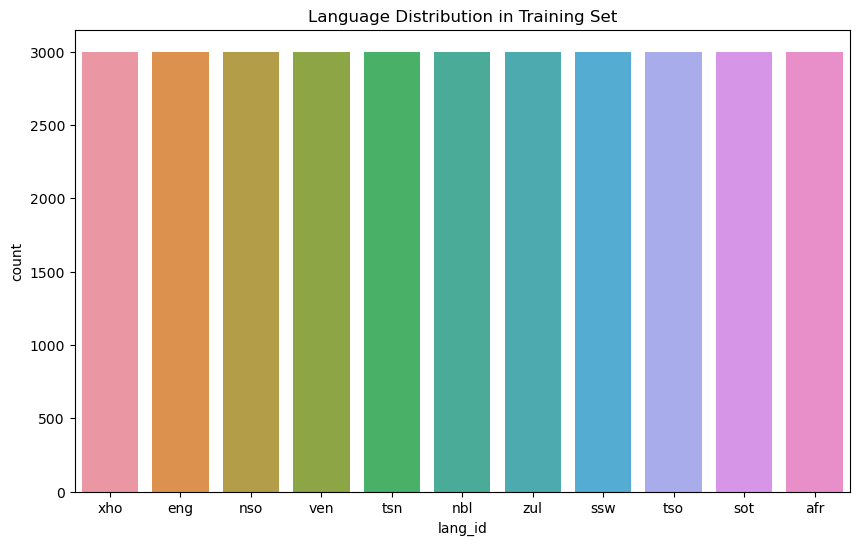

In [14]:
# Language distribution in the training set
plt.figure(figsize=(10, 6))
sns.countplot(x='lang_id', data=train)
plt.title('Language Distribution in Training Set')
plt.show()

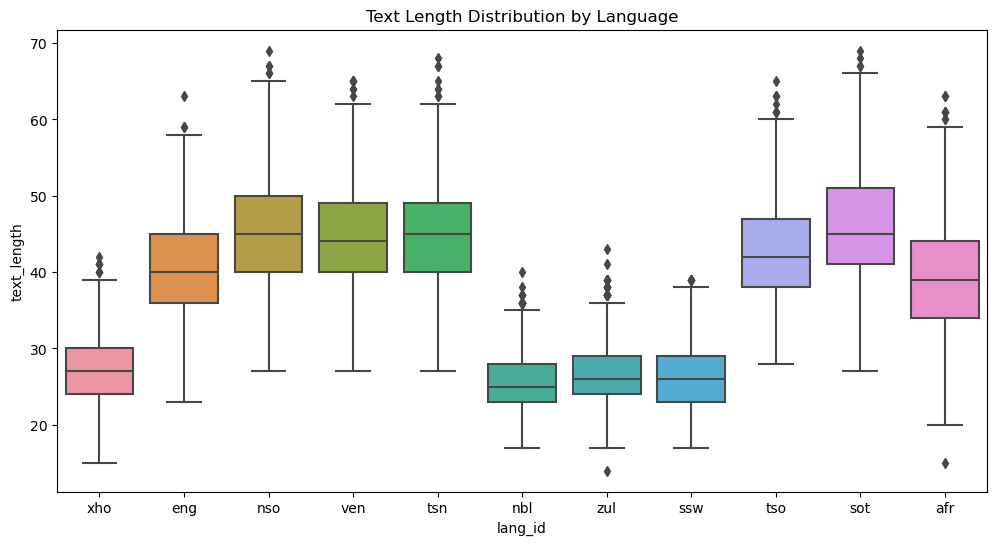

In [15]:
# Text length distribution for each language
train['text_length'] = train['text'].apply(lambda x: len(word_tokenize(x)))
plt.figure(figsize=(12, 6))
sns.boxplot(x='lang_id', y='text_length', data=train)
plt.title('Text Length Distribution by Language')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train[['text_length', 'word_count']], train['lang_id'], test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = rf_classifier.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Train the final model on the full training data
final_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
final_rf_classifier.fit(train[['text_length', 'word_count']], train['lang_id'])

# Make predictions on the test set
test_predictions = final_rf_classifier.predict(test[['text_length', 'word_count']])

# Save predictions to a CSV file
test['lang_id'] = test_predictions
test[['index', 'lang_id']].to_csv("predictions.csv", index=False)


Validation Accuracy: 0.24575757575757576

Classification Report:
              precision    recall  f1-score   support

         afr       0.30      0.29      0.29       583
         eng       0.24      0.22      0.23       615
         nbl       0.32      0.34      0.33       583
         nso       0.22      0.22      0.22       625
         sot       0.20      0.19      0.19       618
         ssw       0.28      0.32      0.30       584
         tsn       0.20      0.20      0.20       598
         tso       0.19      0.22      0.20       561
         ven       0.20      0.20      0.20       634
         xho       0.29      0.26      0.27       609
         zul       0.27      0.25      0.26       590

    accuracy                           0.25      6600
   macro avg       0.25      0.25      0.25      6600
weighted avg       0.25      0.25      0.25      6600



In [16]:
# Word frequency analysis for each language
stop_words = set(stopwords.words('english'))  # Assuming English stopwords for now
def process_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return tokens


In [17]:
train['processed_text'] = train['text'].apply(process_text)
word_counts = train.groupby('lang_id')['processed_text'].sum().apply(Counter)
top_words = word_counts.apply(lambda x: [word for word, _ in x.most_common(10)])

In [18]:
print("Top 10 words for each language:")
for lang, words in top_words.items():
    print(f"{lang}: {', '.join(words)}")

Top 10 words for each language:
afr: die, van, en, n, te, wat, word, om, nie, vir
eng: act, may, section, must, shall, r, terms, south, person, national
nbl: namkha, bona, begodu, kanye, kufanele, umsebenzi, bonyana, khona, afrika, umuntu
nso: go, ya, le, ka, e, tša, ba, di, wa, se
sot: ho, le, ya, ka, e, ba, tsa, ke, ha, tse
ssw: kutsi, nobe, kanye, uma, futsi, kumele, ngabe, afrika, kute, bantfu
tsn: go, le, ya, e, ka, mo, di, tsa, ba, wa
tso: ku, ya, hi, na, nga, eka, wa, va, ta, ka
ven: u, ya, na, vha, nga, kha, ha, wa, dza, tshi
xho: ukuba, okanye, kufuneka, kunye, kwaye, xa, na, ke, umntu, afrika
zul: noma, kanye, ukuthi, uma, futhi, kufanele, lapho, ukuze, umuntu, kumele


# data engeenering


In [21]:
import pandas as pd
from nltk.corpus import wordnet
import random
import re

# Function to add noise to text
def add_noise(text, noise_level=0.1):
    words = text.split()
    num_noise_words = max(1, int(len(words) * noise_level))
    for _ in range(num_noise_words):
        idx = random.randint(0, len(words)-1)
        words[idx] = ''.join(random.sample(words[idx], len(words[idx])))
    return ' '.join(words)

# Function to replace words with synonyms
def replace_with_synonyms(text):
    words = text.split()
    for i, word in enumerate(words):
        synsets = wordnet.synsets(word)
        if synsets:
            synonym = synsets[0].lemmas()[0].name()
            words[i] = synonym if synonym != word else words[i]
    return ' '.join(words)

# Function to generate paraphrases
def generate_paraphrase(text):
    # You can implement more advanced techniques like using a pre-trained paraphrase generation model here
    # For simplicity, we'll just add a prefix and suffix to each word
    words = text.split()
    paraphrased_words = [f'<PARA>{word}<PARA>' for word in words]
    return ' '.join(paraphrased_words)

# Apply data augmentation techniques to train data
augmented_train = pd.DataFrame()
augmented_train['text'] = train['text']
augmented_train['augmented_text'] = augmented_train['text'].apply(add_noise)
augmented_train['augmented_text'] = augmented_train['augmented_text'].apply(replace_with_synonyms)
augmented_train['augmented_text'] = augmented_train['augmented_text'].apply(generate_paraphrase)

# Combine original and augmented train data
combined_train = pd.concat([train, augmented_train], ignore_index=True)

# Shuffle the combined train data
combined_train = combined_train.sample(frac=1).reset_index(drop=True)

# Print the first few rows of the augmented train data
print("Augmented train data:")
print(combined_train.head())


Augmented train data:
  lang_id                                               text  \
0     nso  o etetše ngaka yeo o dirilego diteko tša madi ...   
1     NaN  dira gore palo tšeo tše pedi di dumelelane ka ...   
2     zul  umongameli motlanthe kanye nezithunywa zakhe b...   
3     NaN  ukuba ukupheliswa komtshato kuthatha ixesha el...   
4     NaN  imali osalele ngayo emva nayo seyifakiwe emrho...   

                                      processed_text  text_length  word_count  \
0  etetš ngaka yeo dirilego diteko tša madi tša t...        219.0        45.0   
1                                                NaN          NaN         NaN   
2  umongam motlanth kany nezithunywa zakh bazobam...        220.0        22.0   
3                                                NaN          NaN         NaN   
4                                                NaN          NaN         NaN   

                                      augmented_text  
0                                                Na

In [11]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Load the dataset
train = pd.read_csv("C:/Users/LAURYN/Downloads/south-african-language-identification-hack-2023/train_set.csv")
test = pd.read_csv("C:/Users/LAURYN/Downloads/south-african-language-identification-hack-2023/test_set.csv")

# Initialize stemmer and stopwords
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text)
    processed_tokens = [stemmer.stem(token.lower()) for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return ' '.join(processed_tokens)

# Apply preprocessing to train and test data
train['processed_text'] = train['text'].apply(preprocess_text)
test['processed_text'] = test['text'].apply(preprocess_text)

# Print the preprocessed train and test data
print("Train data after preprocessing:")
print(train.head())

print("\nTest data after preprocessing:")
print(test.head())


Train data after preprocessing:
  lang_id                                               text  \
0     xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...   
1     xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...   
2     eng  the province of kwazulu-natal department of tr...   
3     nso  o netefatša gore o ba file dilo ka moka tše le...   
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...   

                                      processed_text  
0  wenza amalungiselelo kumaziko axhasa ulawulo l...  
1  iya kuba nobulumko bokubeka umsebenzi naphi na...  
2  provinc depart transport invit tender establis...  
3  netefatša gore ba file dilo ka moka tše le dum...  
4  khomishini ya ndinganyiso ya mbeu yo ewa maana...  

Test data after preprocessing:
   index                                               text  \
0      1  Mmasepala, fa maemo a a kgethegileng a letlele...   
1      2  Uzakwaziswa ngokufaneleko nakungafuneka eminye...   
2      3         Tshivhumbeo tsh

In [12]:
# Initialize CountVectorizer for Bag of Words (BoW) representation
count_vectorizer = CountVectorizer(max_features=5000)

# Fit and transform the training data
X_train_counts = count_vectorizer.fit_transform(train['processed_text'])

# Transform the test data
X_test_counts = count_vectorizer.transform(test['processed_text'])

# Print the shapes of the transformed data
print("\nShape of X_train_counts:", X_train_counts.shape)
print("Shape of X_test_counts:", X_test_counts.shape)


Shape of X_train_counts: (33000, 5000)
Shape of X_test_counts: (5682, 5000)


In [13]:
# Add more features to the dataset
train['text_length'] = train['text'].apply(lambda x: len(x))
train['word_count'] = train['text'].apply(lambda x: len(x.split()))

# Print the first few rows of the dataset with the new features
print("Train data with additional features:")
print(train.head())

# Continue with more data engineering steps...


Train data with additional features:
  lang_id                                               text  \
0     xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...   
1     xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...   
2     eng  the province of kwazulu-natal department of tr...   
3     nso  o netefatša gore o ba file dilo ka moka tše le...   
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...   

                                      processed_text  text_length  word_count  
0  wenza amalungiselelo kumaziko axhasa ulawulo l...          220          24  
1  iya kuba nobulumko bokubeka umsebenzi naphi na...          252          31  
2  provinc depart transport invit tender establis...          264          37  
3  netefatša gore ba file dilo ka moka tše le dum...          217          40  
4  khomishini ya ndinganyiso ya mbeu yo ewa maana...          239          43  


In [14]:
# Additional features: text length and word count
train['text_length'] = train['text'].apply(lambda x: len(x))
test['text_length'] = test['text'].apply(lambda x: len(x))
train['word_count'] = train['text'].apply(lambda x: len(x.split()))
test['word_count'] = test['text'].apply(lambda x: len(x.split()))

# Print the first few rows of the train and test data with additional features
print("\nTrain data with additional features:")
print(train.head())

print("\nTest data with additional features:")
print(test.head())


Train data with additional features:
  lang_id                                               text  \
0     xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...   
1     xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...   
2     eng  the province of kwazulu-natal department of tr...   
3     nso  o netefatša gore o ba file dilo ka moka tše le...   
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...   

                                      processed_text  text_length  word_count  
0  wenza amalungiselelo kumaziko axhasa ulawulo l...          220          24  
1  iya kuba nobulumko bokubeka umsebenzi naphi na...          252          31  
2  provinc depart transport invit tender establis...          264          37  
3  netefatša gore ba file dilo ka moka tše le dum...          217          40  
4  khomishini ya ndinganyiso ya mbeu yo ewa maana...          239          43  

Test data with additional features:
   index                                               text 

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer for character n-grams
char_vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 3), max_features=5000)

# Fit and transform the training data
X_train_char = char_vectorizer.fit_transform(train['processed_text'])

# Transform the test data
X_test_char = char_vectorizer.transform(test['processed_text'])


# hyperperemeter tuning

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the GridSearchCV to the training data with the additional features
grid_search.fit(train[['text_length', 'word_count']], train['lang_id'])

# Print the best parameters found by GridSearchCV
print("Best parameters:", grid_search.best_params_)

# Print the best score found by GridSearchCV
print("Best score:", grid_search.best_score_)


Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best score: 0.2624848484848485


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train[['text_length', 'word_count']], train['lang_id'], test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = rf_classifier.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Train the final model on the full training data
final_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
final_rf_classifier.fit(train[['text_length', 'word_count']], train['lang_id'])

# Make predictions on the test set
test_predictions = final_rf_classifier.predict(test[['text_length', 'word_count']])

# Save predictions to a CSV file
test['lang_id'] = test_predictions
test[['index', 'lang_id']].to_csv("predictions.csv", index=False)


Validation Accuracy: 0.24575757575757576

Classification Report:
              precision    recall  f1-score   support

         afr       0.30      0.29      0.29       583
         eng       0.24      0.22      0.23       615
         nbl       0.32      0.34      0.33       583
         nso       0.22      0.22      0.22       625
         sot       0.20      0.19      0.19       618
         ssw       0.28      0.32      0.30       584
         tsn       0.20      0.20      0.20       598
         tso       0.19      0.22      0.20       561
         ven       0.20      0.20      0.20       634
         xho       0.29      0.26      0.27       609
         zul       0.27      0.25      0.26       590

    accuracy                           0.25      6600
   macro avg       0.25      0.25      0.25      6600
weighted avg       0.25      0.25      0.25      6600



In [24]:
# Error analysis
errors = X_val[y_val != y_pred]
correct_labels = y_val[y_val != y_pred]
incorrect_labels = y_pred[y_val != y_pred]

# Print some examples of misclassified instances
for i in range(min(5, errors.getnnz())):
    print("\nMisclassified Example:")
    print("Predicted:", incorrect_labels[i])
    print("Actual:", correct_labels.iloc[i])
    print("Text:", train.iloc[errors.indices[i]]['text'])



Misclassified Example:
Predicted: xho
Actual: zul
Text: b if they think it expedient as a means of resolving the matter refer the complainant to the companies tribunal or to an accredited entity as defined in section with a recommendation that the complainant seek to resolve the matter with the assistance of that agency or person or

Misclassified Example:
Predicted: eng
Actual: nso
Text: go godisa bopuobontsi go na le mosola o mogolo ka mo lefatsheng jaaka mo aferika borwa mo go nnang le dipuo tsa semmuso tse mmalwa ke ka lebaka le ditiro jaaka transtips di na le bokgoni le mosola wa go diragatsa ditikologo tsa dipuodintsi ka mo mafelong a tiro

Misclassified Example:
Predicted: tsn
Actual: nso
Text: nkatsakanyo nkomiso wu na timhaka ta nkoka leti nga riki ehansi ka a wu nge fikeleli ku katsiwa eka xiyenge xa nkatsakanyo nkomiso wo saseka swinene ku na mahungu lama nga lavekiki lama onhaka vunene bya nkatsakanyo nkomiso

Misclassified Example:
Predicted: zul
Actual: nbl
Text: umnini 

In [27]:
import pandas as pd

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_counts, train['lang_id'], test_size=0.2, random_state=42)

# Train a logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = clf.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))

# Error analysis
errors = X_val[y_val != y_pred]
correct_labels = y_val[y_val != y_pred]
incorrect_labels = y_pred[y_val != y_pred]

# Create a DataFrame with misclassified examples
misclassified_df = pd.DataFrame({
    'Text': train.iloc[errors.indices]['text'],
    'Actual': correct_labels.values,
    'Predicted': incorrect_labels
})

# Save the DataFrame as a CSV file
misclassified_df.to_csv('misclassified_examples.csv', index=False)


Accuracy: 0.9883333333333333

Classification Report:
               precision    recall  f1-score   support

         afr       1.00      0.99      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.97      0.98      0.97       583
         nso       1.00      0.99      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       0.98      0.99      0.99       584
         tsn       1.00      0.99      0.99       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.98      0.97      0.98       609
         zul       0.96      0.96      0.96       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600


Confusion Matrix:
 [[580   1   0   0   0   2   0   0   0   0   0]
 [  0 615   0   0   0   0   0   0   0   0   0]
 [  0   0 569   0  

ValueError: array length 77 does not match index length 547